In [4]:
import jax
import jax.numpy as jnp
import myjax.nn as nn
import myjax.optim as optim
from myjax.utils import Dataset, DataLoader
import matplotlib.pyplot as plt

In [5]:
def mse_loss(input, target):
    return jnp.mean((input-target)**2)


class MyModel(nn.Model):
    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential([nn.Linear(1, 128), nn.Relu(),
                                    nn.Linear(128, 128), nn.Relu(), nn.Linear(128, 1)])

    def training_step(self, params, batch):
        # MSE Loss
        x, y = batch
        # print (params)
        y_hat = self.model(params, x)
        loss = mse_loss(y_hat, y)
        return loss

    def configure_optimizers(self):
        sgd = optim.SGD(learning_rate=0.03)
        return sgd



The model is: 
Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True), Total parameters: 256, 
  (1): Relu(), Total parameters: 0, 
  (2): Linear(in_features=128, out_features=128, bias=True), Total parameters: 16512, 
  (3): Relu(), Total parameters: 0, 
  (4): Linear(in_features=128, out_features=1, bias=True), Total parameters: 129, 
)
Total parameters: 16897

Epoch (    0/  500) train_loss = 13.015
Epoch (  100/  500) train_loss = 0.062085
Epoch (  200/  500) train_loss = 0.03716
Epoch (  300/  500) train_loss = 0.059469
Epoch (  400/  500) train_loss = 0.035542
Epoch (  500/  500) train_loss = 0.010791


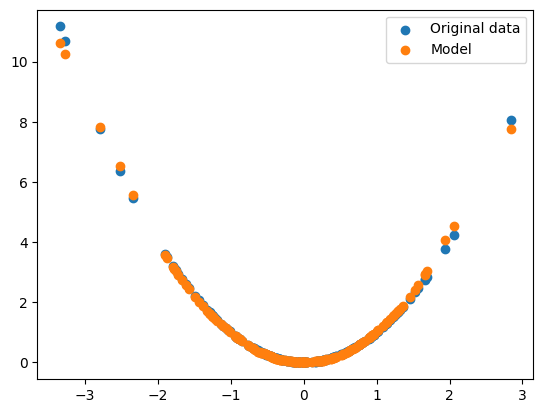

In [7]:
# Random data for testing
seed = 1701
key = jax.random.PRNGKey(seed)
key, x_key, n_key = jax.random.split(key, num=3)

# Quadratic model
xs = jax.random.normal(x_key, shape=(200,1))
ys = xs**2

# Create dataset
dataset = Dataset(xs, ys)

# Create dataloader
data = DataLoader(dataset, key=key, batch_size=40)

# Create model
mymodel = MyModel()

# Initialize Model
key, l1_key = jax.random.split(key)
key, params = mymodel.init(key)
print ('\nThe model is: ')
print (mymodel)


# Initialize trainer
trainer = nn.Trainer(max_epochs=500)
#print ('\nThe initial parameters are: ')
#print (params)

# Fit model
params = trainer.fit(params, mymodel, data, log_epoch=100)
#print (params)

# Compare final answer
plt.figure()
plt.scatter(xs, ys,label='Original data')
y_hat = jnp.array(mymodel.model(params, xs))
plt.scatter(xs, y_hat,label='Model')
plt.legend();

